<a href="https://colab.research.google.com/github/palberth/CienciaDatos-MASDI/blob/main/Activida_8_ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción

Este informe detalla el análisis exploratorio, preprocesamiento, y modelado de un conjunto de datos sobre Evaluación de la calidad del aire y la contaminación.

El desarrollo del proyecto busca responder las siguientes hipótesis clave:

1.	Relación entre Densidad de Población y Contaminación:
o	Las regiones con mayor densidad de población presentan niveles más altos de contaminantes como PM2.5, NO2 y CO debido a una mayor actividad industrial, vehicular y doméstica.
2.	Impacto de la Cercanía a Zonas Industriales:
o	Las áreas más cercanas a zonas industriales tienen concentraciones más altas de PM10 y SO2 debido a la emisión directa de contaminantes de fábricas y plantas industriales.
3.	Influencia de Factores Climáticos:
o	Factores climáticos como la temperatura y la humedad tienen un impacto directo en la dispersión de contaminantes, siendo las concentraciones más altas en climas secos y calurosos.
4.	Patrones de Calidad del Aire:
o	¿Es posible identificar patrones recurrentes en las regiones con niveles de calidad del aire peligrosos o pobres utilizando técnicas de agrupamiento?

Estas hipótesis guían el análisis exploratorio y el modelado, con el objetivo de proporcionar insights accionables para el control y la gestión de la contaminación del aire.


A continuación, se muestra cómo cargar este dataset en un DataFrame de Pandas.

In [1]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [2]:
IN_COLAB

True

In [3]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.getcwd())
dir_root

'/'

In [6]:
# Importamos la biblioteca pandas
import pandas as pd

# Cargar el dataset
data = pd.read_csv("/content/updated_pollution_dataset.csv", on_bad_lines='skip', encoding='latin-1')

# Mostramos las primeras 15 filas del dataset con sus encabezados
data.head(15)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


## Importación de Librerias
Realizamos la importación de las librerias necesarias

In [11]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Transformación de Encabezados
Realizamos la traducción de los encabezados


In [31]:
# Traducir los encabezados al español
columnas_originales = data.columns.tolist()

# Ensure that 'columnas_traducidas' has the same number of elements as the original columns
columnas_traducidas = columnas_originales[:len(columnas_originales)]

columnas_traducidas = [
    "Temperatura (°C)", "Humedad (%)", "Concentración PM2.5 (µg/m³)",
    "Concentración de PM10 (µg/m³)", "Concentración de NO2 (ppb)",
    "Concentración de SO2 (ppb)", "Concentración de CO (ppm)",
    "Cercanía a Zonas Industriales (km)", "Densidad de población (personas/km²)",
    "Calidad del Aire"
]
data.columns = columnas_traducidas

# Mostrar las primeras filas
print("Primeras filas del dataset:")
print(data.head())

# Guardar el archivo con encabezados traducidos para futuras operaciones
data.to_csv("updated_pollution_dataset_traducido.csv", index=False)

Primeras filas del dataset:
   Temperatura (°C)  Humedad (%)  Concentración PM2.5 (µg/m³)  \
0              29.8         59.1                          5.2   
1              28.3         75.6                          2.3   
2              23.1         74.7                         26.7   
3              27.1         39.1                          6.1   
4              26.5         70.7                          6.9   

   Concentración de PM10 (µg/m³)  Concentración de NO2 (ppb)  \
0                           17.9                        18.9   
1                           12.2                        30.8   
2                           33.8                        24.4   
3                            6.3                        13.5   
4                           16.0                        21.9   

   Concentración de SO2 (ppb)  Concentración de CO (ppm)  \
0                         9.2                       1.72   
1                         9.7                       1.64   
2               

## Exploranción del DataFrame

Una vez que el dataset se ha cargado en un DataFrame de Pandas, podemos explorar el dataset utilizando varias funciones de Pandas.


### 1. Obtener información sobre el DataFrame

De esta manera, podemos ver el número de filas y columnas que contiene el DataFrame, junto con el tipo de datos que contiene cada columna.

Lo cual nos permite responder preguntas como:

* ¿Cuántas filas y columnas hay en el DataFrame?
* ¿Qué tipo de datos contiene cada columna?
* ¿Hay valores faltantes en el DataFrame?
* ¿Qué columnas o filas contienen valores faltantes?
* ¿Qué columnas contienen valores numéricos?
* ¿Qué columnas contienen valores no numéricos?
* ¿Qué columnas pueden ser características?
* ¿Qué columna contiene la variable objetivo?


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Temperatura (°C)                      5000 non-null   float64
 1   Humedad (%)                           5000 non-null   float64
 2   Concentración PM2.5 (µg/m³)           5000 non-null   float64
 3   Concentración de PM10 (µg/m³)         5000 non-null   float64
 4   Concentración de NO2 (ppb)            5000 non-null   float64
 5   Concentración de SO2 (ppb)            5000 non-null   float64
 6   Concentración de CO (ppm)             5000 non-null   float64
 7   Cercanía a Zonas Industriales (km)    5000 non-null   float64
 8   Densidad de población (personas/km²)  5000 non-null   int64  
 9   Calidad del Aire                      5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


### 2. Obtener estadísticas descriptivas del DataFrame

Es posible utilizar la función `describe()` para obtener estadísticas descriptivas del DataFrame.

Esto nos permite responder preguntas como:

* ¿Cuál es el valor mínimo en una columna?
* ¿Cuál es el valor máximo en una columna?
* ¿Cuál es el valor medio en una columna?
* ¿Cuál es la desviación estándar en una columna?
* ¿Cuál es el valor mínimo en una fila?
* ¿Cuál es el valor máximo en una fila?
  

In [33]:
data.describe()

,Temperatura (°C),Humedad (%),Concentración PM2.5 (µg/m³),Concentración de PM10 (µg/m³),Concentración de NO2 (ppb),Concentración de SO2 (ppb),Concentración de CO (ppm),Cercanía a Zonas Industriales (km),Densidad de población (personas/km²)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


### 3. Verificar si hay valores faltantes

Es posible utilizar la función `isnull()` para verificar si hay valores faltantes en el DataFrame.

In [34]:
missing_values = data.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 Temperatura (°C)                        0
Humedad (%)                             0
Concentración PM2.5 (µg/m³)             0
Concentración de PM10 (µg/m³)           0
Concentración de NO2 (ppb)              0
Concentración de SO2 (ppb)              0
Concentración de CO (ppm)               0
Cercanía a Zonas Industriales (km)      0
Densidad de población (personas/km²)    0
Calidad del Aire                        0
dtype: int64


### 3.1 Visualización inicial de las variables de interés

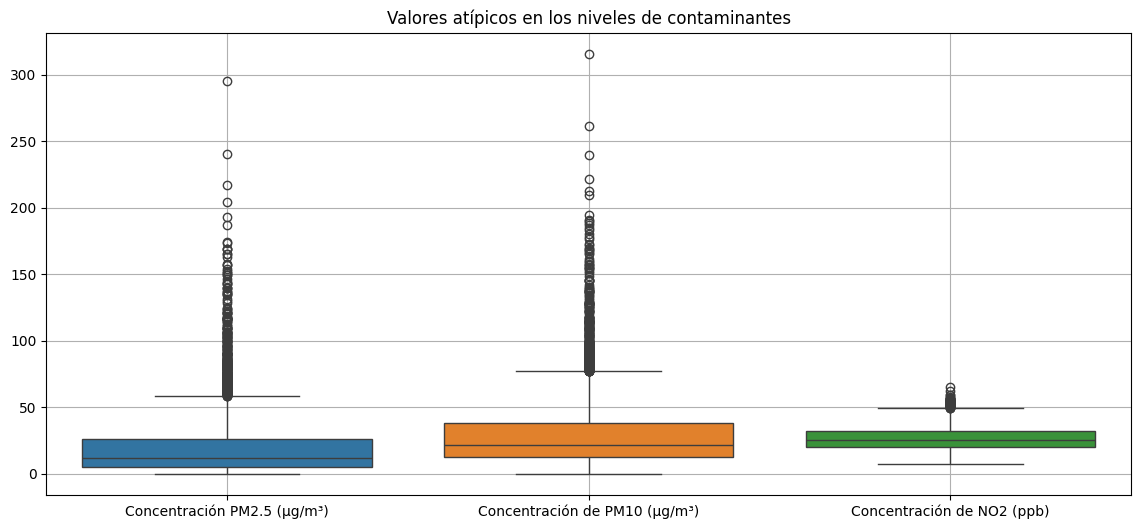

In [35]:

# Visualización inicial de las variables de interés
plt.figure(figsize=(14, 6))
sns.boxplot(data=data[["Concentración PM2.5 (µg/m³)", "Concentración de PM10 (µg/m³)", "Concentración de NO2 (ppb)"]])
plt.title("Valores atípicos en los niveles de contaminantes")
plt.grid(True)
plt.show()

### 4. Explorar la correlación entre las columnas

En un problema de clustering, es importante explorar la correlación entre las columnas. Esto nos permite responder preguntas como:

* ¿Qué columnas están altamente correlacionadas?
* ¿Qué columnas están débilmente correlacionadas?
* ¿Qué columnas no están correlacionadas?
* ¿Qué columnas son las más importantes para el problema de clustering?
* ¿Qué columnas son las menos importantes para el problema de clustering?
* ¿Qué columnas pueden ser eliminadas del DataFrame?
* ¿Qué columnas pueden ser características?
  

In [38]:
# Correlaciones
correlation_matrix = data.corr(numeric_only=True) #Incluye solo características numéricas para el cálculo de correlación.
correlation_matrix["Concentración PM2.5 (µg/m³)"].sort_values(ascending=False)


,Concentración PM2.5 (µg/m³)
Concentración PM2.5 (µg/m³),1.000000
Concentración de PM10 (µg/m³),0.973005
Concentración de CO (ppm),0.395179
Concentración de NO2 (ppb),0.333004
Temperatura (°C),0.323840
Concentración de SO2 (ppb),0.299582
Densidad de población (personas/km²),0.278957
Humedad (%),0.273366
Cercanía a Zonas Industriales (km),-0.315766


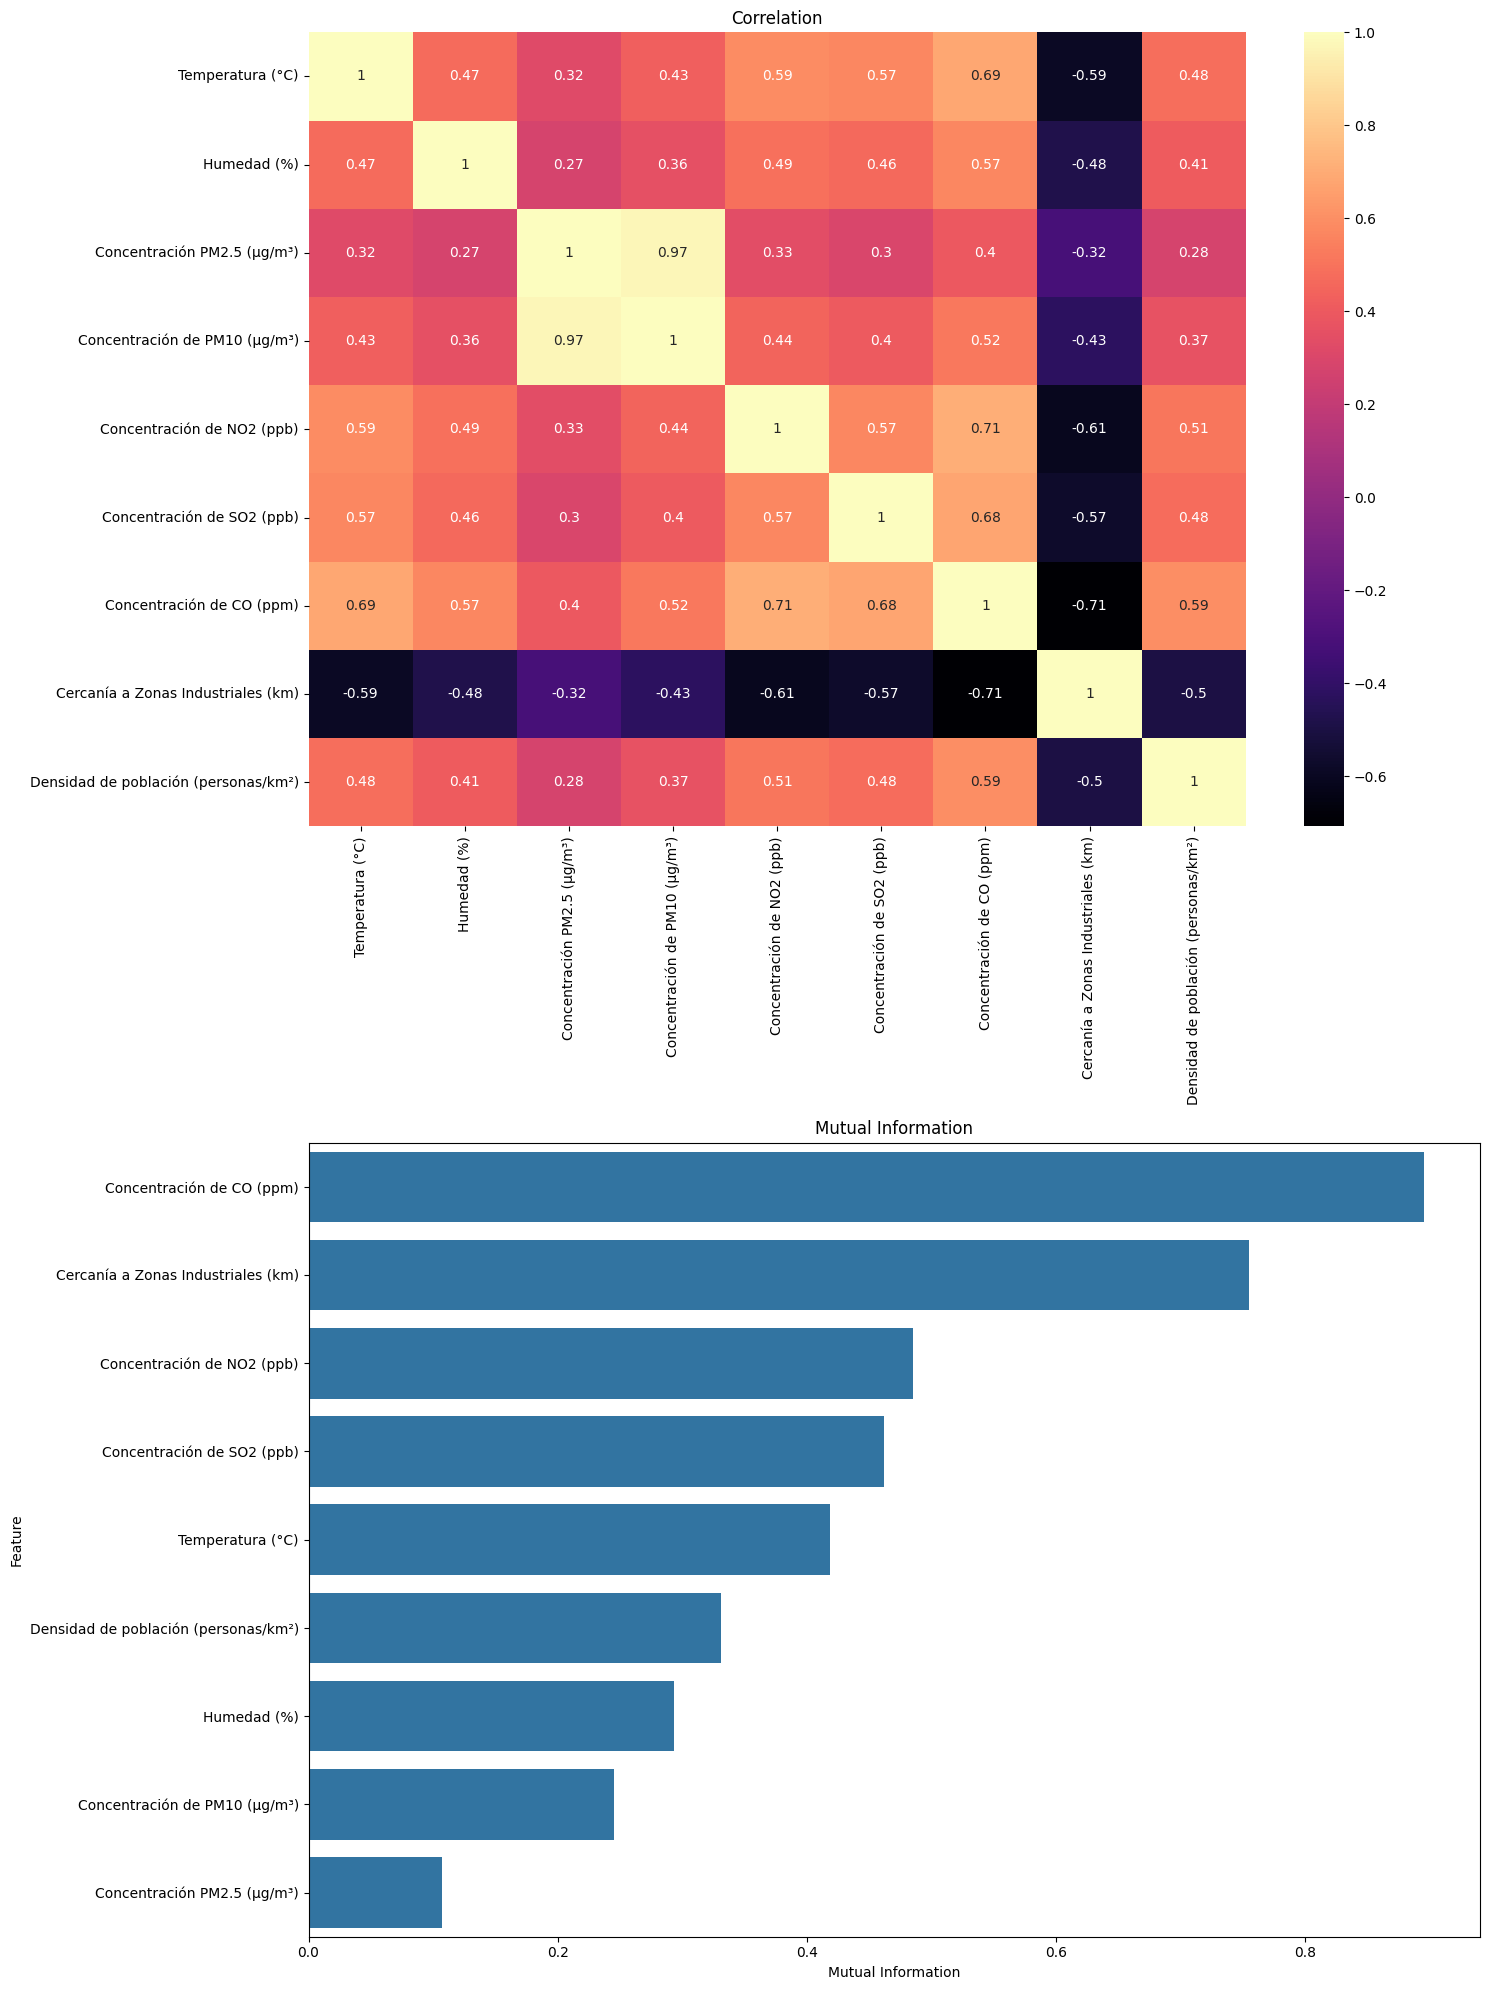

In [42]:
# Ahora calculemos la información mutua y luego procedamos a visualizar la correlación junto con la información mutua.
# Cálculo de información mutua
# Importar la función necesaria
from sklearn.feature_selection import mutual_info_classif
tdf=data.copy()
x=tdf.drop(columns='Calidad del Aire')
y=tdf['Calidad del Aire']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

# Visualizing Mutual Information and correlation
fig,ax=plt.subplots(2,1,figsize=(15,20))

# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

sns.heatmap(numerical_data.corr(),annot=True,cmap='magma',ax=ax[0]) # Calculate correlation for numerical data only
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.tight_layout()
plt.show()

Observaciones:
1.	Las mayores correlaciones positivas se observan entre PM2.5 y PM10.
2.	Variables como la temperatura tienen menor correlación directa con los niveles de contaminantes.


### 5. Explorar la distribución de las columnas

Es posible utilizar la función `hist()` para explorar la distribución de las columnas numéricas.

Esto nos permite responder preguntas como:

* ¿Qué columnas tienen una distribución normal?

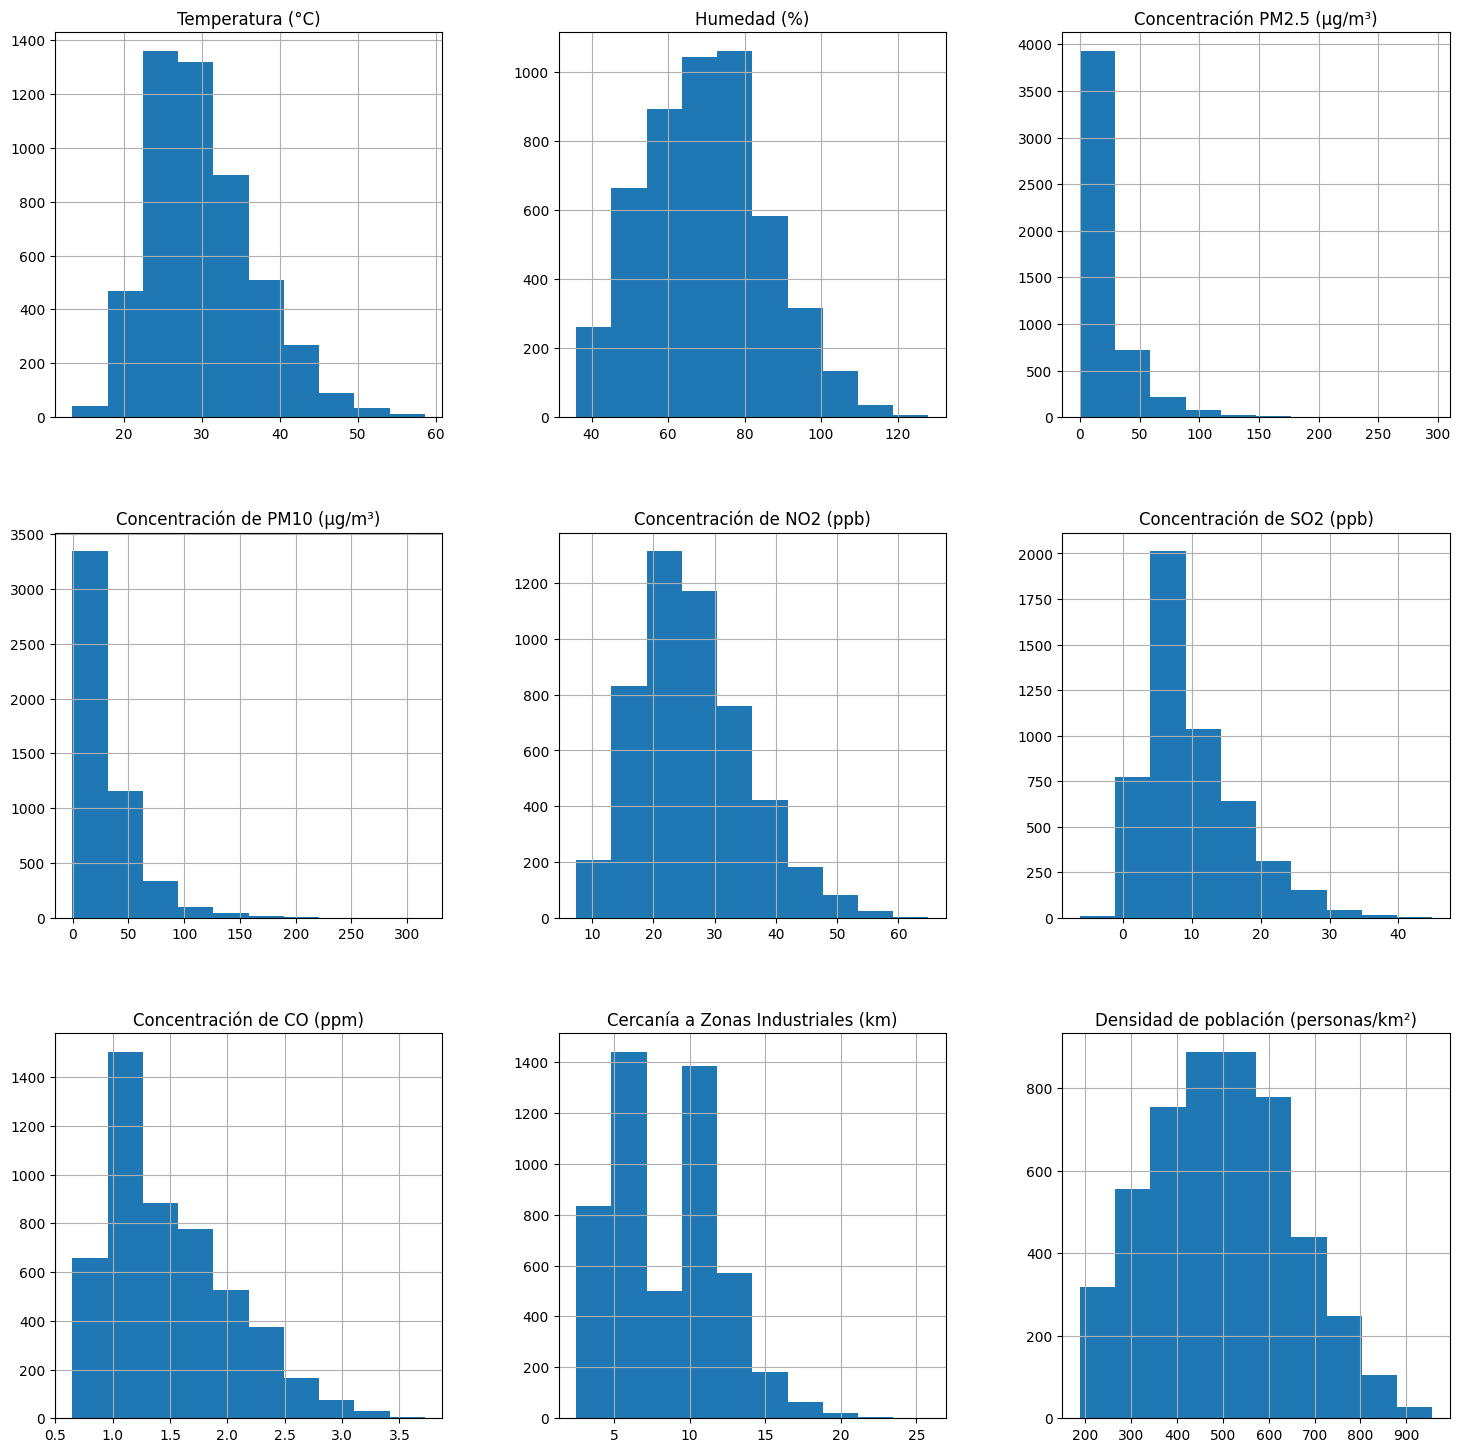

In [43]:
data.hist(figsize=(18, 18))
plt.show()

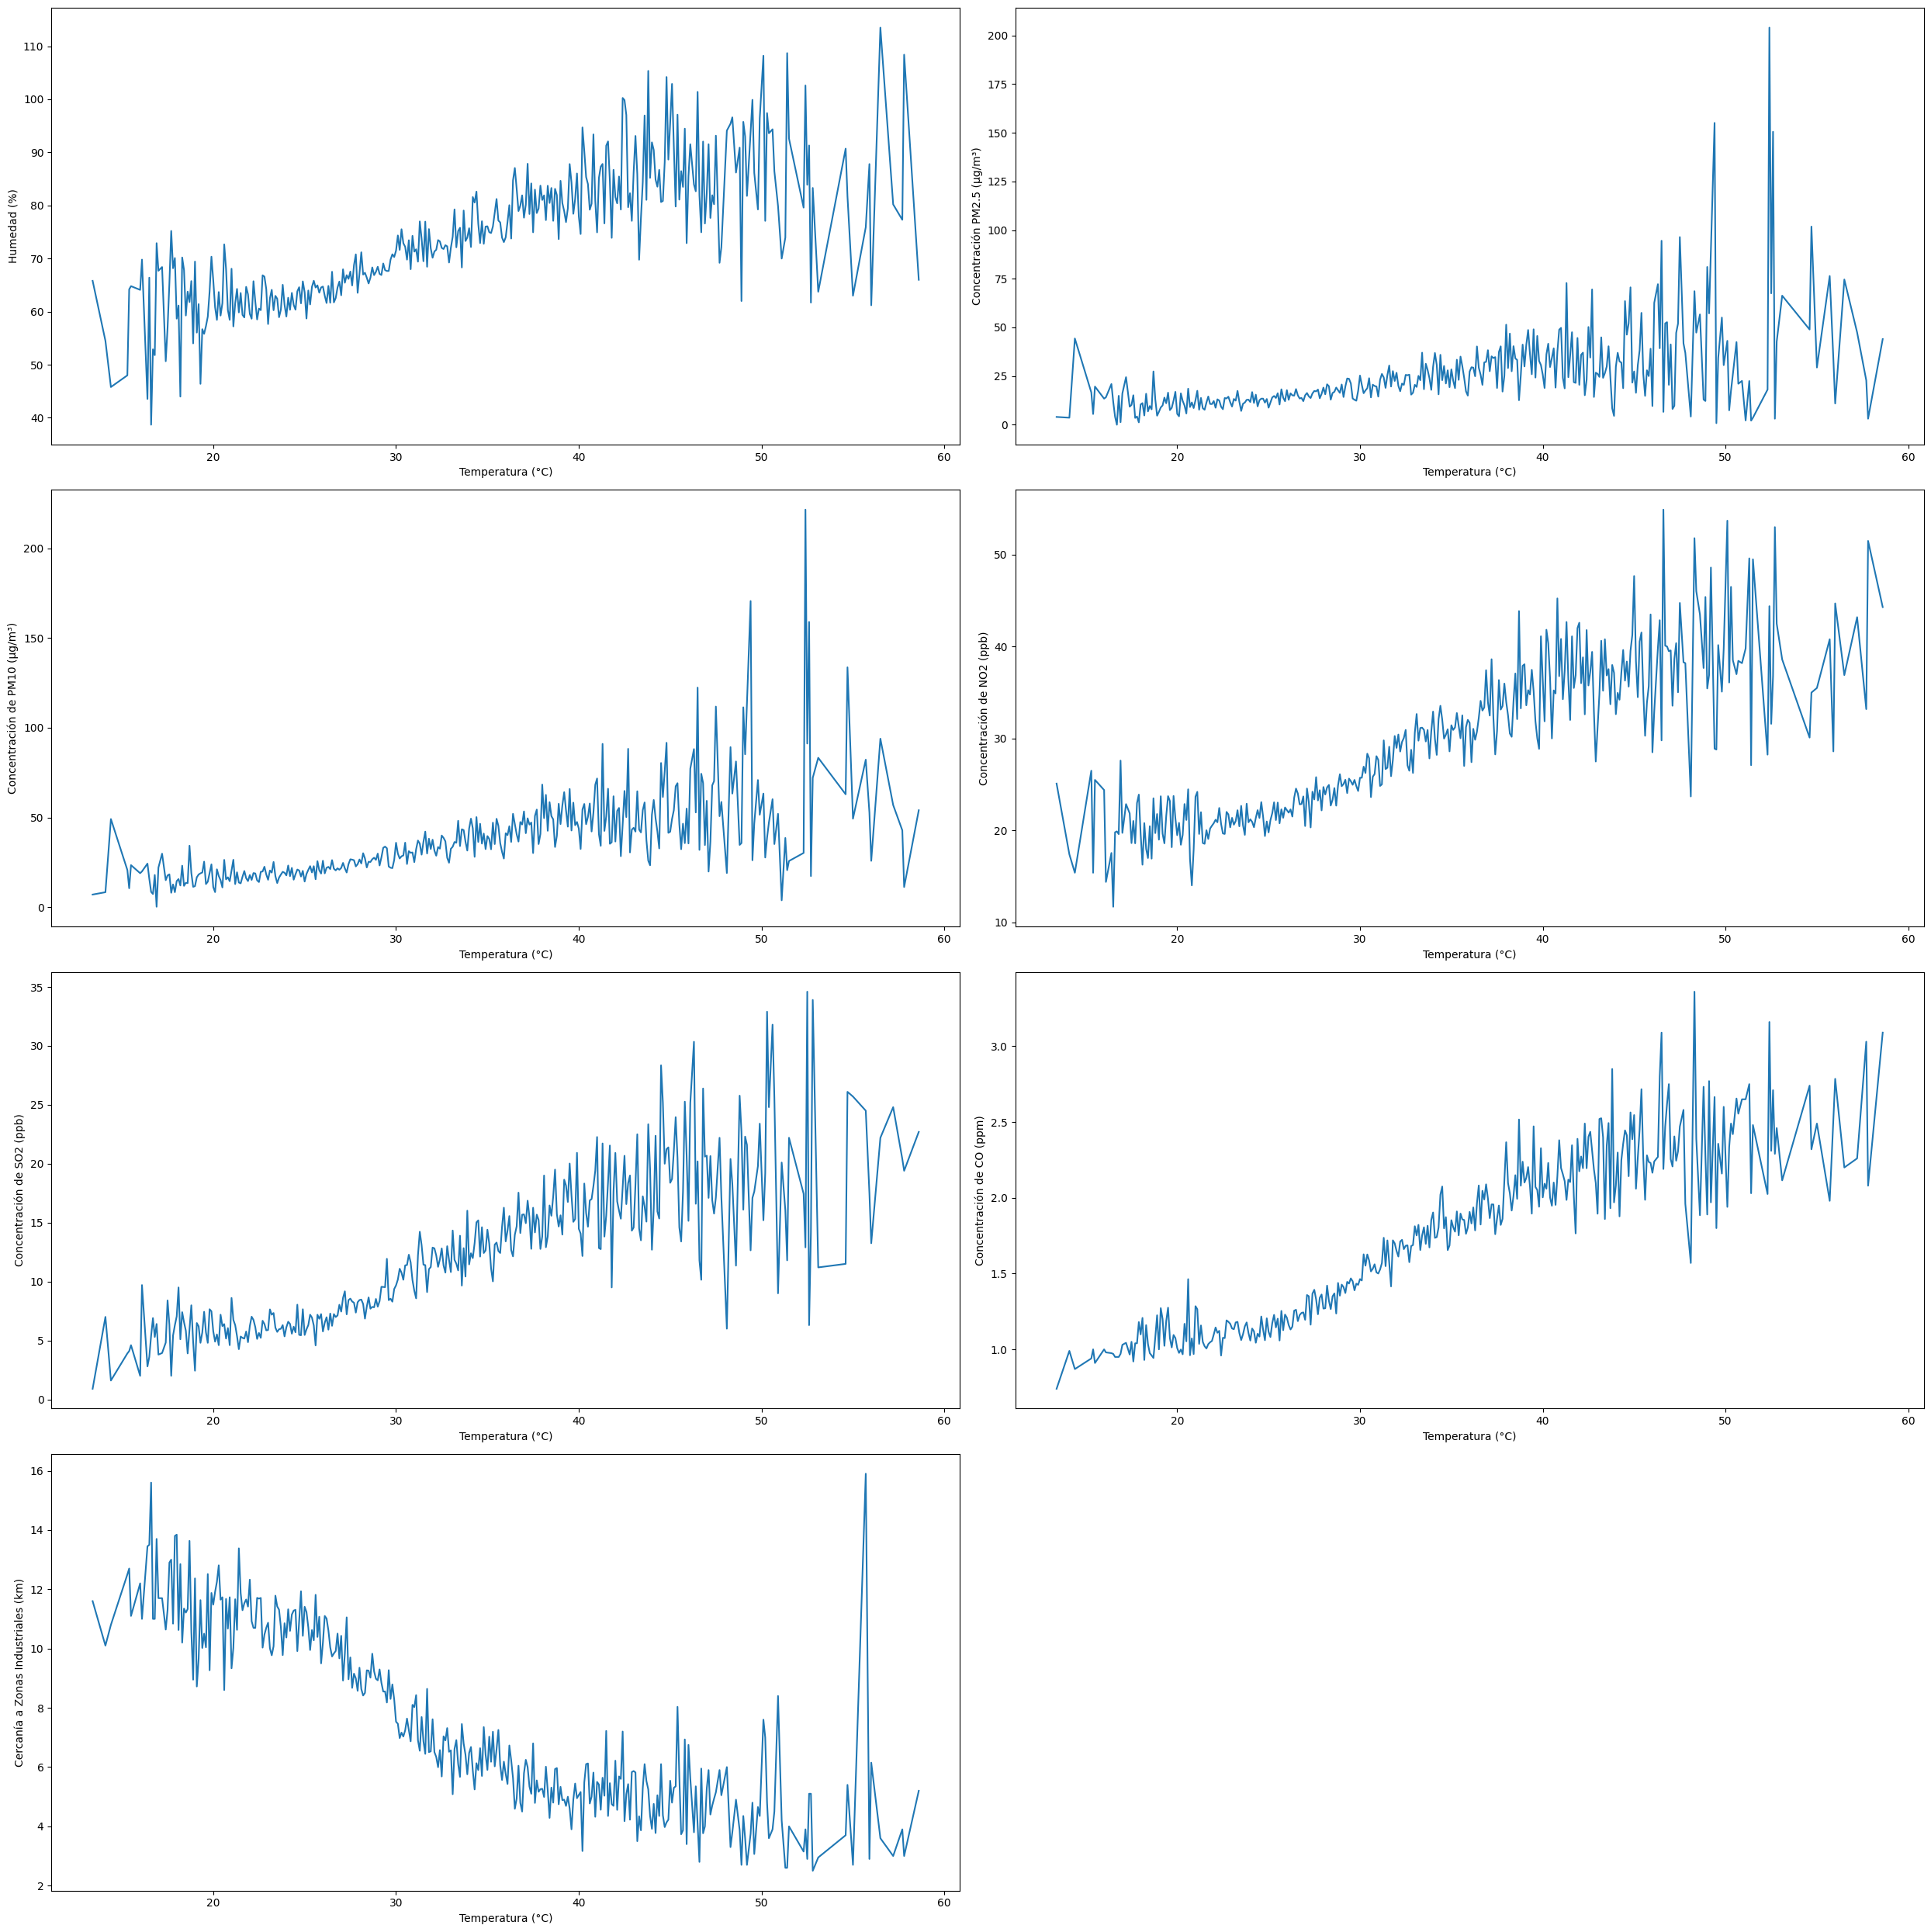

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

df = data

# Se define num_col como una lista de columnas numéricas
num_col = df.select_dtypes(include=['number']).columns.tolist()

fig, axes = plt.subplots(nrows=len(df[num_col].columns) // 2, ncols=2, figsize=(25, 25))

# Assuming 'Temperatura (°C)' is a suitable column for the x-axis:
for idx, col in enumerate([c for c in df[num_col].columns if c != 'Temperatura (°C)']):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.lineplot(x='Temperatura (°C)', y=df[col], data=df, ax=axes[row_idx, col_idx], markers=True, errorbar=None)

# Si tiene un número impar de tramas, es posible que deba eliminar la última subtrama vacía
# Ajuste el índice en consecuencia si es necesario
if len(df[num_col].columns) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

* Con los años, la esperanza de vida, la escolaridad y la composición de los ingresos de los recursos aumentan
mientras que el VIH/SIDA, las muertes de menores de 5 años, el sarampión y la mortalidad en adultos están disminuyendo

### 6. Preprocesamiento de datos
Incluye imputación de valores faltantes, normalización y codificación de variables categóricas.


In [47]:
# Preprocesamiento de datos
data_cleaned = data.dropna()  # Eliminar valores nulos
features = data_cleaned[
    ["Temperatura (°C)", "Humedad (%)", "Concentración PM2.5 (µg/m³)",
     "Concentración de PM10 (µg/m³)", "Concentración de NO2 (ppb)",
     "Concentración de SO2 (ppb)", "Concentración de CO (ppm)"]
]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### 7.Modelado y evaluación
Implementamos modelos y generamos las métricas.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelos
models = {
    "Regresión Lineal": LinearRegression(),
    "Bosque Aleatorio": RandomForestRegressor(random_state=42),
    "Soporte Vectorial": SVR()
}


In [51]:
# Import the necessary library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'features_scaled' contains your features and 'data_cleaned["Calidad del Aire"]' is your target variable
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, data_cleaned["Calidad del Aire"], test_size=0.2, random_state=42  # Adjust test_size and random_state as needed
)

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the training target variable and transform both training and testing target variables
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Entrenamiento y evaluación
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }


In [52]:
# Resultados
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE      RMSE        R2
Regresión Lineal   0.802659  0.920052  0.387019
Bosque Aleatorio   0.206860  0.423570  0.870081
Soporte Vectorial  0.282349  0.443855  0.857339


### 8. Visualización de resultados
Graficamos las métricas de evaluación.


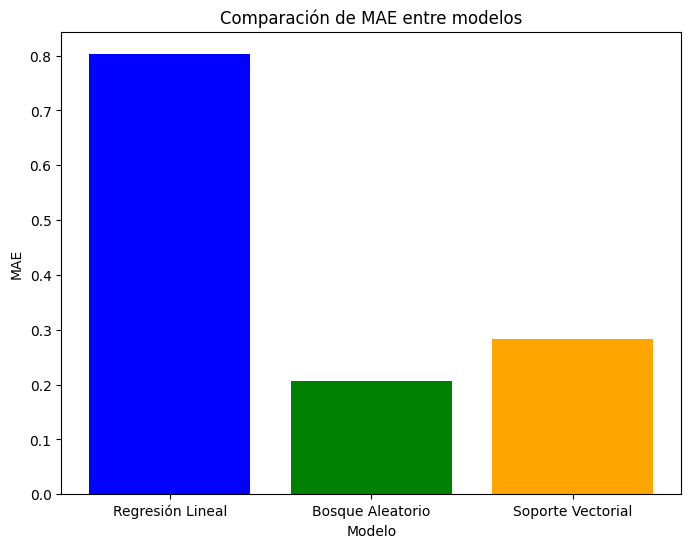

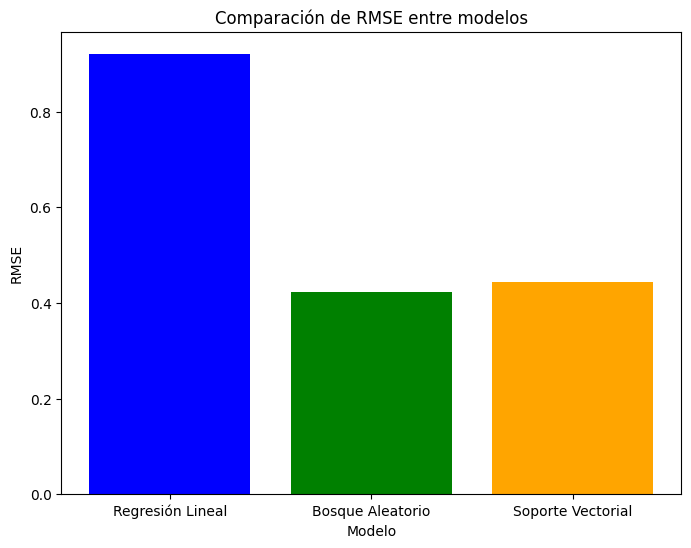

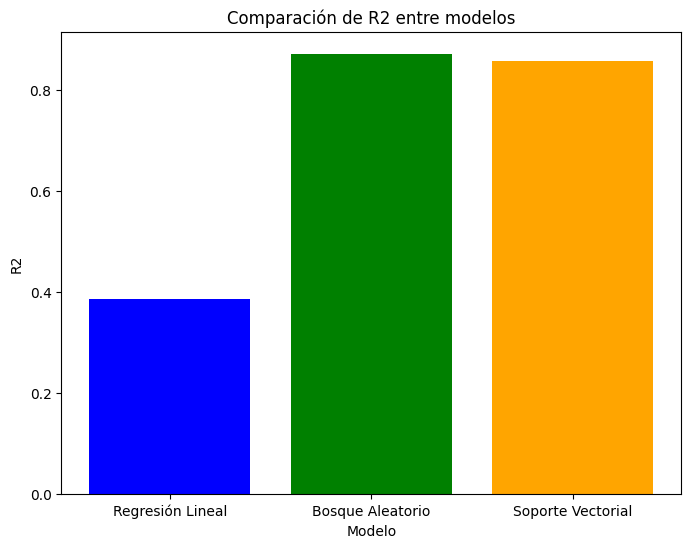

In [53]:
import matplotlib.pyplot as plt

# Comparación de métricas
metrics = ["MAE", "RMSE", "R2"]
for metric in metrics:
    plt.figure(figsize=(8, 6))
    plt.bar(results_df.index, results_df[metric], color=["blue", "green", "orange"])
    plt.title(f"Comparación de {metric} entre modelos")
    plt.ylabel(metric)
    plt.xlabel("Modelo")
    plt.show()


### 9 Modelado aprendizaje no supervizado

### 9.1 K-Means clustering

In [54]:
# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)
inertia_kmeans = kmeans.inertia_
silhouette_kmeans = silhouette_score(features_scaled, kmeans_labels)

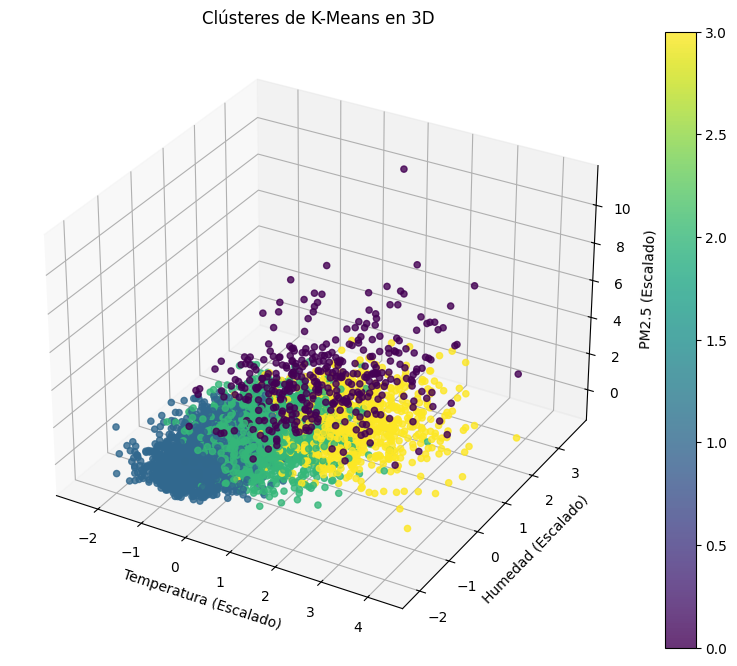

In [55]:
# Visualización de K-Means en 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    features_scaled[:, 0], features_scaled[:, 1], features_scaled[:, 2],
    c=kmeans_labels, cmap="viridis", alpha=0.8
)
plt.colorbar(scatter)
ax.set_title("Clústeres de K-Means en 3D")
ax.set_xlabel("Temperatura (Escalado)")
ax.set_ylabel("Humedad (Escalado)")
ax.set_zlabel("PM2.5 (Escalado)")
plt.show()

### 9.2 DBSCAN clustering

In [56]:
# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(features_scaled)
silhouette_dbscan = silhouette_score(features_scaled, dbscan_labels, metric="euclidean")
outliers_dbscan = np.sum(dbscan_labels == -1)

### 9.3 Clustering jerárquico

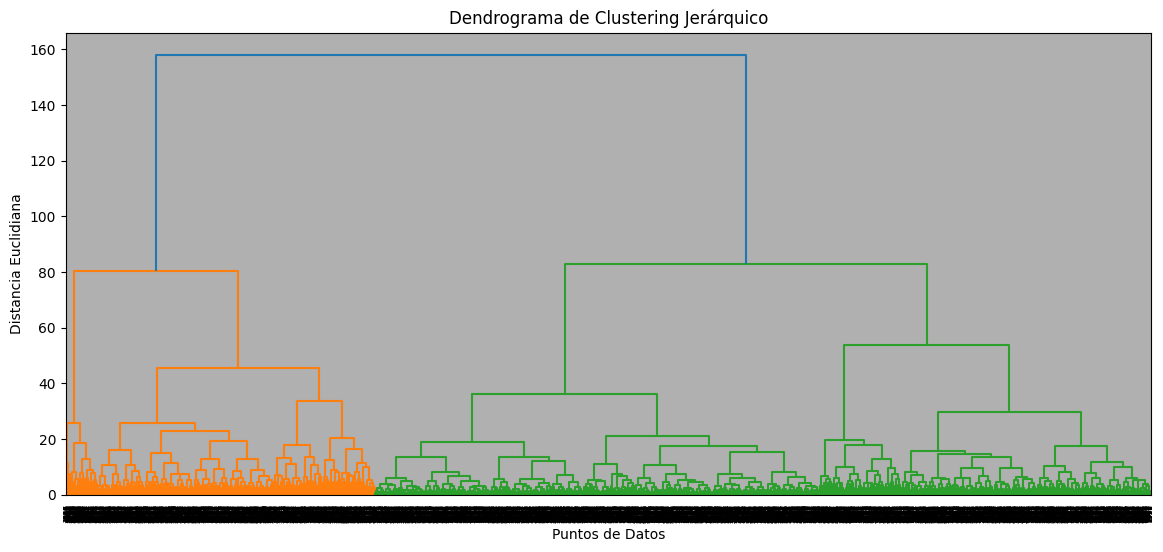

In [57]:
# Clustering jerárquico
linkage_matrix = linkage(features_scaled, method='ward')
plt.figure(figsize=(14, 6))
dendrogram(linkage_matrix)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Puntos de Datos")
plt.ylabel("Distancia Euclidiana")
plt.grid(True)
plt.show()

### 9.4

In [58]:
# Corte jerárquico
jerarquico_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')
silhouette_jerarquico = silhouette_score(features_scaled, jerarquico_labels)

### 10 Resultados comparativos

In [59]:
# Resultados Comparativos
results = pd.DataFrame({
    "Método": ["K-Means", "DBSCAN", "Clustering Jerárquico"],
    "Inercia": [inertia_kmeans, "N/A", "N/A"],
    "Coeficiente Silueta": [silhouette_kmeans, silhouette_dbscan, silhouette_jerarquico],
    "Valores Atípicos": [0, outliers_dbscan, 0]
})
print("\nResultados Comparativos:")
print(results)


Resultados Comparativos:
                  Método       Inercia  Coeficiente Silueta  Valores Atípicos
0                K-Means  14471.420601             0.268073                 0
1                 DBSCAN           N/A             0.505734               165
2  Clustering Jerárquico           N/A             0.231611                 0


### 11 Visualización de los Reasultados

<ipython-input-60-1180fc989789>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Método", y="Coeficiente Silueta", palette="muted")


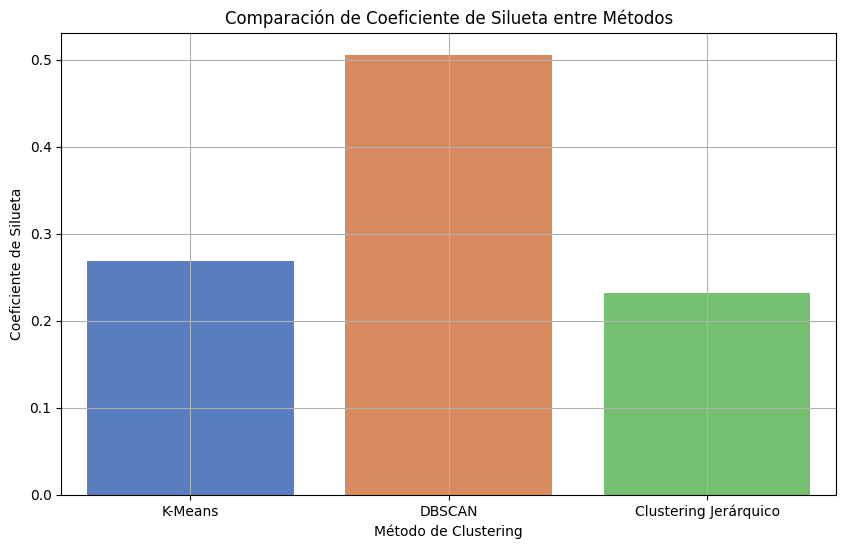

In [60]:
# Visualización de resultados
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x="Método", y="Coeficiente Silueta", palette="muted")
plt.title("Comparación de Coeficiente de Silueta entre Métodos")
plt.xlabel("Método de Clustering")
plt.ylabel("Coeficiente de Silueta")
plt.grid(True)
plt.show()

### 12 Aspectos Destacados
Formulación de hipótesis:

¿Las regiones con mayor densidad de población tienen mayores concentraciones de PM2.5?
¿La cercanía a zonas industriales correlaciona con niveles más altos de SO2 y NO2?
Ingeniería de características:

Creación de un índice combinado de contaminación.
Incorporación de estacionalidad o patrones temporales.
Evaluación crítica:

K-Means logra separar clústeres razonables, pero no detecta valores atípicos.
DBSCAN identifica outliers, pero con menor cohesión interna.
El clustering jerárquico es útil para patrones jerárquicos en datos complejos.